<a href="https://colab.research.google.com/github/Sujeet2003/Quora-Question-Pair/blob/main/Quora_Question_Pair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/q_quora.csv')

In [ ]:
df = df.iloc[:, 0:6]

In [ ]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
245215,245215,482916,482917,How do you get rid of marks left by pimples?,How can I get rid of pimples & marks permanently?,0
56958,56958,113320,113321,How do I find the underground water to dig a b...,Where does well water come from?,0
251400,251400,494938,494939,What are the pros of eating snake meat?,What are the pros and cons of eating peacock m...,1
176805,176805,349274,349275,What is it like to be born in a Dalit family i...,Does any top company of India have Dalit CEO?,0
151501,151501,299687,299688,How can I learn digital marketing for free?,How do I start learning digital marketing?,0
213708,213708,71152,421438,Is it important to have love in life?,What is love? What importance in my life?,1
173829,173829,343440,343441,How will Indian GDP be affected from banning 5...,What will be the effects of demonitizing 500 a...,1
264864,264864,521112,521113,Do educated Pakistanis think that the partitio...,"How do I stay fit, focussed and motivated all ...",0
350705,350705,687051,687052,How would I ever decorate my bedroom?,How would I ever decorate a bedroom?,1
135861,135861,269009,269010,Why is AT&T buying Time Warner?,What is the rationale for AT&T to buy Time War...,1


In [ ]:
df = df[(df['is_duplicate'] == '0') | (df['is_duplicate'] == '1')]

In [ ]:
df.shape

(404015, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404015 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404015 non-null  int64 
 1   qid1          404015 non-null  int64 
 2   qid2          404015 non-null  int64 
 3   question1     404014 non-null  object
 4   question2     404013 non-null  object
 5   is_duplicate  404015 non-null  object
dtypes: int64(3), object(3)
memory usage: 21.6+ MB


In [ ]:
df['is_duplicate'] = df['is_duplicate'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404015 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404015 non-null  int64 
 1   qid1          404015 non-null  int64 
 2   qid2          404015 non-null  int64 
 3   question1     404014 non-null  object
 4   question2     404013 non-null  object
 5   is_duplicate  404015 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [ ]:
# Missing Values
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


**Info**: Here we got `1 & 2 values` are missing in `question1 & question2 columns` respectively.

In [ ]:
# duplicated Rows
df.duplicated().sum()

0

Total Count
is_duplicate
0    254748
1    149267
Name: count, dtype: int64

Percentage
is_duplicate
0    63.054095
1    36.945905
Name: proportion, dtype: float64


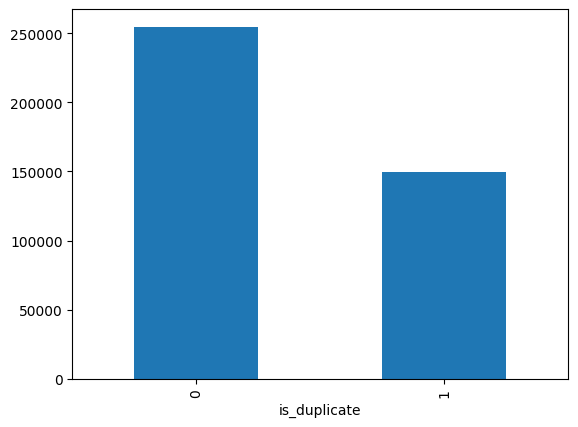

In [ ]:
# distribution of duplicated and non-duplicated questions

total_ques = df['is_duplicate'].value_counts()
print("Total Count")
print(total_ques)

print("\nPercentage")
print(df['is_duplicate'].value_counts(normalize=True)*100)

total_ques.plot(kind='bar')
plt.show()

In [ ]:
# Repeated Questions

ques_id = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_ques = np.unique(ques_id).shape[0]
print("Unique Questions:", unique_ques)

x = ques_id.value_counts() > 1
print("Repeated Questions:", x.value_counts()[1])

Unique Questions: 789154
Repeated Questions: 13675


In [ ]:
# For testing we are reduing the size because it's around 4 lacs of data so taking more time to run this

sample_df = df.sample(30000)

In [ ]:
sample_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [ ]:
sample_df.duplicated().sum()

0

In [ ]:
# creating only questions dataframe
ques_df = sample_df[['question1', 'question2']]
ques_df

,question1,question2
397626,How do I find my Facebook user ID?,I forgot my Facebook password and email passwo...
66380,Why is China of an expansionist mindset unlike...,China in 2014: Why is China following an expan...
58793,What is Cubital tunnel surgery called?,What is Cubital tunnel surgery?
258516,Can you use baby powder as deodorant? Why or w...,Why is talcum powder used in baby powder?
25464,Is it still safe to use Tor?,Which browser should be used with TOR/Orbot?
...,...,...
229859,What is the function of a diode in a generator...,Why is there no output when the diode in half-...
144999,How can I load a prepaid card with a credit card?,Can you load a prepaid card with a credit card?
177011,I'm 23 and have no income. I'm homeless and no...,I am 23 and lost. What should I do?
374649,How did I fail in an exam despite trying hard ...,What is it like to try as hard as you can and ...


In [ ]:
# merging texts
questions = list(ques_df['question1'].dropna()) + list(ques_df['question2'].dropna())

# CountVectorizer for Bag Of Words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=3000)

# splitting in between to make half-half questions
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
temp_df['is_duplicate'] = df['is_duplicate']

In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
397626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
58793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
258516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144999,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
177011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
374649,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# applying train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:, 0:-1].values, temp_df.iloc[:, -1].values, test_size=0.2, random_state=20)

In [ ]:
# using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.74

Using `RandomForestClassifier` we got that, without doing any `feature engineering` or `preprocessing` we are getting the `accuracy approx 74%`

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy_score(y_test, y_pred)

0.727

Using `XGBoost Algorithm` we got that, without doing any `feature engineering` or `preprocessing` we are getting the `accuracy approx 73%`.

# Feature Engineering on `30000 samples` selected data

In [ ]:
sample_df

,id,qid1,qid2,question1,question2,is_duplicate
397626,397626,27370,776938,How do I find my Facebook user ID?,I forgot my Facebook password and email passwo...,0
66380,66380,131973,131974,Why is China of an expansionist mindset unlike...,China in 2014: Why is China following an expan...,1
58793,58793,116956,116957,What is Cubital tunnel surgery called?,What is Cubital tunnel surgery?,1
258516,258516,508796,508797,Can you use baby powder as deodorant? Why or w...,Why is talcum powder used in baby powder?,0
25464,25464,50786,50787,Is it still safe to use Tor?,Which browser should be used with TOR/Orbot?,0
...,...,...,...,...,...,...
229859,229859,452967,452968,What is the function of a diode in a generator...,Why is there no output when the diode in half-...,0
144999,144999,286940,286941,How can I load a prepaid card with a credit card?,Can you load a prepaid card with a credit card?,1
177011,177011,349678,349679,I'm 23 and have no income. I'm homeless and no...,I am 23 and lost. What should I do?,1
374649,374649,732993,732994,How did I fail in an exam despite trying hard ...,What is it like to try as hard as you can and ...,0


In [ ]:
# generating columns having length of theirs question

sample_df['q1_len'] = sample_df['question1'].str.len()
sample_df['q2_len'] = sample_df['question2'].str.len()

In [ ]:
sample_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
397626,397626,27370,776938,How do I find my Facebook user ID?,I forgot my Facebook password and email passwo...,0,34,78
66380,66380,131973,131974,Why is China of an expansionist mindset unlike...,China in 2014: Why is China following an expan...,1,53,61
58793,58793,116956,116957,What is Cubital tunnel surgery called?,What is Cubital tunnel surgery?,1,38,31
258516,258516,508796,508797,Can you use baby powder as deodorant? Why or w...,Why is talcum powder used in baby powder?,0,53,41
25464,25464,50786,50787,Is it still safe to use Tor?,Which browser should be used with TOR/Orbot?,0,28,44
...,...,...,...,...,...,...,...,...
229859,229859,452967,452968,What is the function of a diode in a generator...,Why is there no output when the diode in half-...,0,80,147
144999,144999,286940,286941,How can I load a prepaid card with a credit card?,Can you load a prepaid card with a credit card?,1,49,47
177011,177011,349678,349679,I'm 23 and have no income. I'm homeless and no...,I am 23 and lost. What should I do?,1,85,35
374649,374649,732993,732994,How did I fail in an exam despite trying hard ...,What is it like to try as hard as you can and ...,0,93,57


In [ ]:
# generating columns for Number of Words

sample_df['q1_word_count'] = sample_df['question1'].apply(lambda x: len(x.split(" ")))
sample_df['q2_word_count'] = sample_df['question2'].apply(lambda x: len(x.split(" ")))

In [ ]:
sample_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count
397626,397626,27370,776938,How do I find my Facebook user ID?,I forgot my Facebook password and email passwo...,0,34,78,8,14
66380,66380,131973,131974,Why is China of an expansionist mindset unlike...,China in 2014: Why is China following an expan...,1,53,61,9,10
58793,58793,116956,116957,What is Cubital tunnel surgery called?,What is Cubital tunnel surgery?,1,38,31,6,5
258516,258516,508796,508797,Can you use baby powder as deodorant? Why or w...,Why is talcum powder used in baby powder?,0,53,41,11,8
25464,25464,50786,50787,Is it still safe to use Tor?,Which browser should be used with TOR/Orbot?,0,28,44,7,7
...,...,...,...,...,...,...,...,...,...,...
229859,229859,452967,452968,What is the function of a diode in a generator...,Why is there no output when the diode in half-...,0,80,147,17,26
144999,144999,286940,286941,How can I load a prepaid card with a credit card?,Can you load a prepaid card with a credit card?,1,49,47,11,10
177011,177011,349678,349679,I'm 23 and have no income. I'm homeless and no...,I am 23 and lost. What should I do?,1,85,35,19,9
374649,374649,732993,732994,How did I fail in an exam despite trying hard ...,What is it like to try as hard as you can and ...,0,93,57,19,14


In [ ]:
# counting number of common words

def common_words(x):
  w1 = set(map(lambda word: word.lower().strip(), x['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), x['question2'].split(" ")))
  return len(w1 & w2)

In [ ]:
sample_df['common_word'] = sample_df.apply(common_words, axis=1)

In [ ]:
sample_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,common_word
397626,397626,27370,776938,How do I find my Facebook user ID?,I forgot my Facebook password and email passwo...,0,34,78,8,14,4
66380,66380,131973,131974,Why is China of an expansionist mindset unlike...,China in 2014: Why is China following an expan...,1,53,61,9,10,5
58793,58793,116956,116957,What is Cubital tunnel surgery called?,What is Cubital tunnel surgery?,1,38,31,6,5,4
258516,258516,508796,508797,Can you use baby powder as deodorant? Why or w...,Why is talcum powder used in baby powder?,0,53,41,11,8,3
25464,25464,50786,50787,Is it still safe to use Tor?,Which browser should be used with TOR/Orbot?,0,28,44,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...
229859,229859,452967,452968,What is the function of a diode in a generator...,Why is there no output when the diode in half-...,0,80,147,17,26,4
144999,144999,286940,286941,How can I load a prepaid card with a credit card?,Can you load a prepaid card with a credit card?,1,49,47,11,10,8
177011,177011,349678,349679,I'm 23 and have no income. I'm homeless and no...,I am 23 and lost. What should I do?,1,85,35,19,9,5
374649,374649,732993,732994,How did I fail in an exam despite trying hard ...,What is it like to try as hard as you can and ...,0,93,57,19,14,2


In [ ]:
# counting total words

def total_words(x):
  w1 = set(map(lambda x: x.lower().strip(), x['question1'].split(" ")))
  w2 = set(map(lambda x: x.lower().strip(), x['question2'].split(" ")))
  return (len(w1) + len(w2))

In [ ]:
sample_df['total_words'] = sample_df.apply(total_words, axis=1)

In [ ]:
sample_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,common_word,total_words
397626,397626,27370,776938,How do I find my Facebook user ID?,I forgot my Facebook password and email passwo...,0,34,78,8,14,4,21
66380,66380,131973,131974,Why is China of an expansionist mindset unlike...,China in 2014: Why is China following an expan...,1,53,61,9,10,5,18
58793,58793,116956,116957,What is Cubital tunnel surgery called?,What is Cubital tunnel surgery?,1,38,31,6,5,4,11
258516,258516,508796,508797,Can you use baby powder as deodorant? Why or w...,Why is talcum powder used in baby powder?,0,53,41,11,8,3,18
25464,25464,50786,50787,Is it still safe to use Tor?,Which browser should be used with TOR/Orbot?,0,28,44,7,7,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
229859,229859,452967,452968,What is the function of a diode in a generator...,Why is there no output when the diode in half-...,0,80,147,17,26,4,34
144999,144999,286940,286941,How can I load a prepaid card with a credit card?,Can you load a prepaid card with a credit card?,1,49,47,11,10,8,19
177011,177011,349678,349679,I'm 23 and have no income. I'm homeless and no...,I am 23 and lost. What should I do?,1,85,35,19,9,5,24
374649,374649,732993,732994,How did I fail in an exam despite trying hard ...,What is it like to try as hard as you can and ...,0,93,57,19,14,2,30


In [ ]:
# shared word which s in both question1 AND QUESTION2

sample_df['shared_words'] = round(sample_df['common_word']/sample_df['total_words'], 2)

In [ ]:
sample_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,common_word,total_words,shared_words
397626,397626,27370,776938,How do I find my Facebook user ID?,I forgot my Facebook password and email passwo...,0,34,78,8,14,4,21,0.19
66380,66380,131973,131974,Why is China of an expansionist mindset unlike...,China in 2014: Why is China following an expan...,1,53,61,9,10,5,18,0.28
58793,58793,116956,116957,What is Cubital tunnel surgery called?,What is Cubital tunnel surgery?,1,38,31,6,5,4,11,0.36
258516,258516,508796,508797,Can you use baby powder as deodorant? Why or w...,Why is talcum powder used in baby powder?,0,53,41,11,8,3,18,0.17
25464,25464,50786,50787,Is it still safe to use Tor?,Which browser should be used with TOR/Orbot?,0,28,44,7,7,0,14,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229859,229859,452967,452968,What is the function of a diode in a generator...,Why is there no output when the diode in half-...,0,80,147,17,26,4,34,0.12
144999,144999,286940,286941,How can I load a prepaid card with a credit card?,Can you load a prepaid card with a credit card?,1,49,47,11,10,8,19,0.42
177011,177011,349678,349679,I'm 23 and have no income. I'm homeless and no...,I am 23 and lost. What should I do?,1,85,35,19,9,5,24,0.21
374649,374649,732993,732994,How did I fail in an exam despite trying hard ...,What is it like to try as hard as you can and ...,0,93,57,19,14,2,30,0.07


# Data Analysis

Question-1
Min length: 1
Max length: 413
Average length: 59

Question-2
Min length: 5
Max length: 1169
Average length: 60


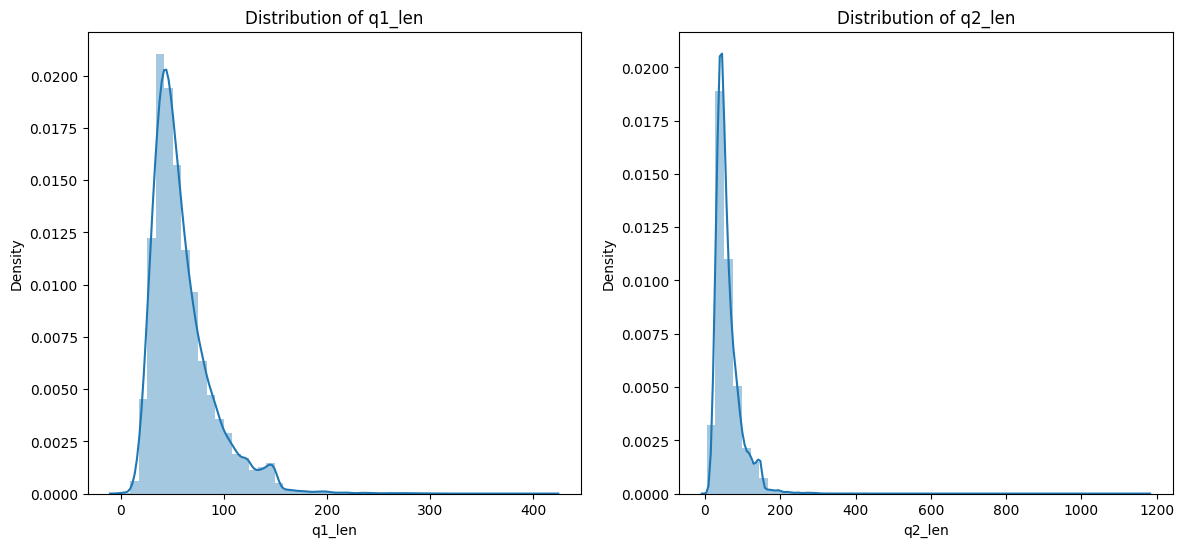

In [ ]:
# plot for q1_length and q2_length
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# q1 plot
sns.distplot(sample_df['q1_len'], ax=ax1)
ax1.set_title('Distribution of q1_len')

print("Question-1")
print("Min length:", sample_df['q1_len'].min())
print("Max length:", sample_df['q1_len'].max())
print("Average length:", int(sample_df['q1_len'].mean()))

# q2 plot
ax2 = sns.distplot(sample_df['q2_len'], ax=ax2)
ax2.set_title('Distribution of q2_len')

print("\nQuestion-2")
print("Min length:", sample_df['q2_len'].min())
print("Max length:", sample_df['q2_len'].max())
print("Average length:", int(sample_df['q2_len'].mean()))

**`CONCLUSION`**: For analysis on `length of questions` we got some `Outliers`.

Questions-1
Min word count: 1
Max word count: 79
Avg word count: 10

Questions-2
Min word count: 1
Max word count: 237
Avg word count: 11


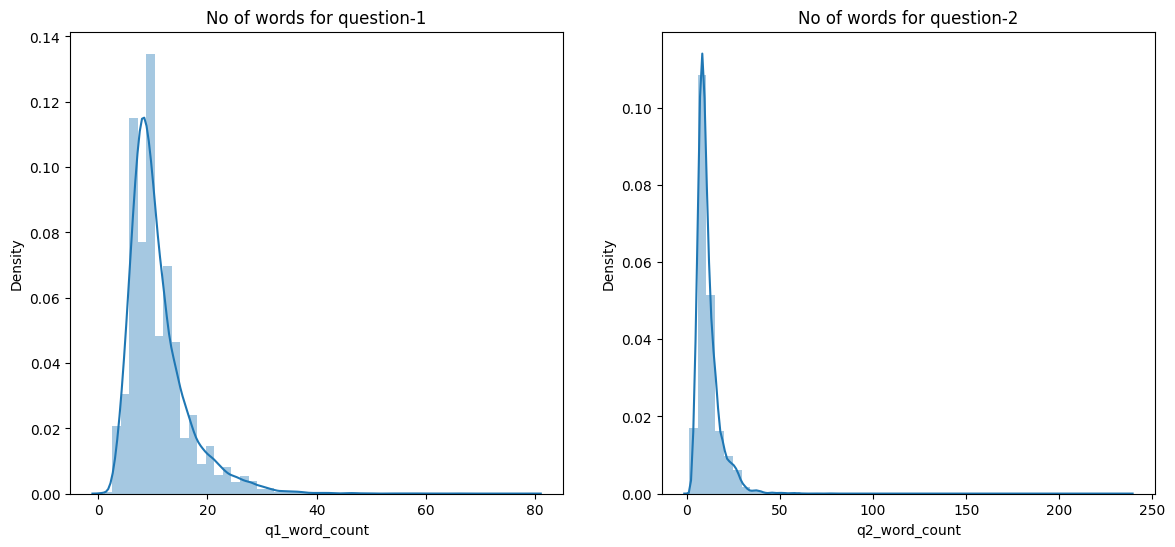

In [ ]:
# plot for number of words for question 1 and question 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# questions-1
sns.distplot(sample_df['q1_word_count'], ax=ax1)
ax1.set_title("No of words for question-1")

print("Questions-1")
print("Min word count:", sample_df['q1_word_count'].min())
print("Max word count:", sample_df['q1_word_count'].max())
print("Avg word count:", int(sample_df['q1_word_count'].mean()))

# question-2
sns.distplot(sample_df['q2_word_count'], ax=ax2)
ax2.set_title("No of words for question-2")

print("\nQuestions-2")
print("Min word count:", sample_df['q2_word_count'].min())
print("Max word count:", sample_df['q2_word_count'].max())
print("Avg word count:", int(sample_df['q2_word_count'].mean()))

**`CONCLUSION`**: While anayyzing `word counts` as well, we got some `Outliers:`

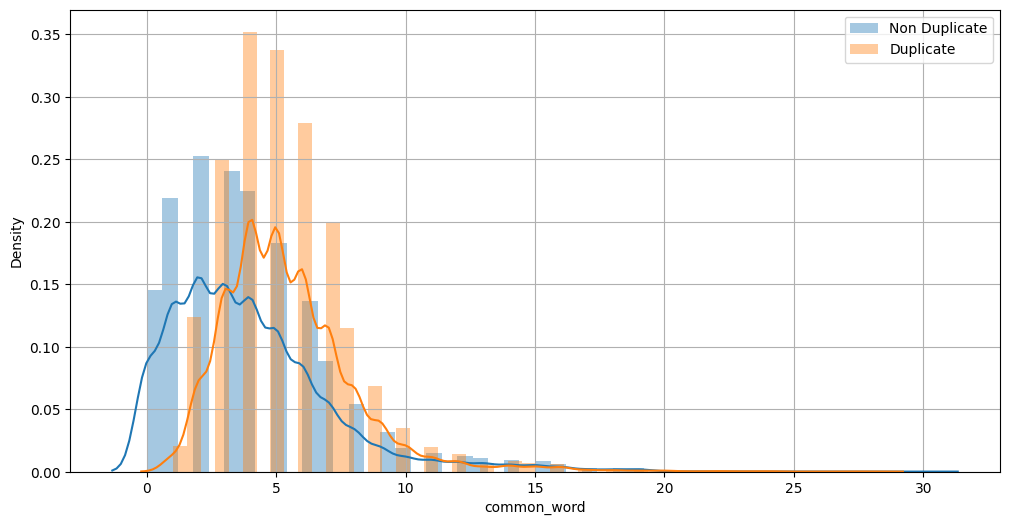

In [ ]:
# common word distribution

fig = plt.figure(figsize=(12, 6))
sns.distplot(sample_df[sample_df['is_duplicate'] == 0]['common_word'], label="Non Duplicate")
sns.distplot(sample_df[sample_df['is_duplicate'] == 1]['common_word'], label="Duplicate")
plt.legend()
plt.grid()
plt.show()

**`CONCLUSION`**: Here we can say that, if we find `common words <= 3` then there are chances of being `Non Duplicate`, while `common words > 3` there are high chances of being `duplicate`.

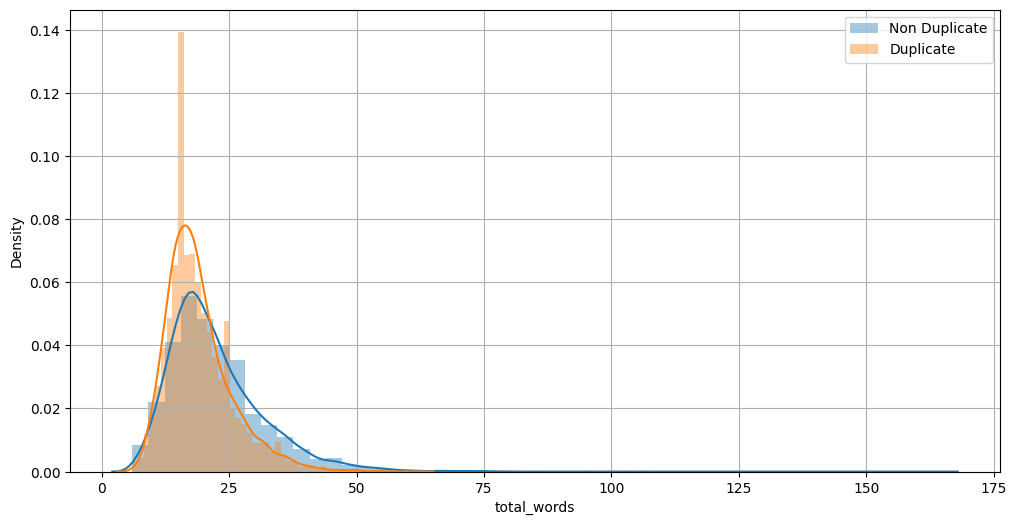

In [ ]:
# total words analysis

fig = plt.figure(figsize=(12, 6))
sns.distplot(sample_df[sample_df['is_duplicate'] == 0]['total_words'], label="Non Duplicate")
sns.distplot(sample_df[sample_df['is_duplicate'] == 1]['total_words'], label="Duplicate")
plt.grid()
plt.legend()
plt.show()

**`CONCLUSION`**: Here we can say that, it the `total words <= approx 23`, then high chances of being `Duplicate`, while `total words > 23` then chances of being `Non Duplicate`.

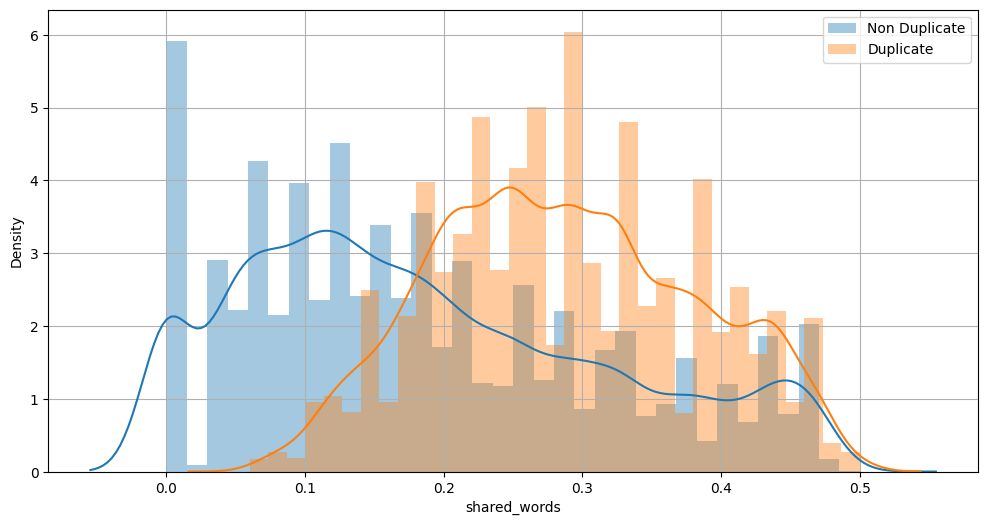

In [ ]:
# shared words analysis

fig = plt.figure(figsize=(12, 6))
sns.distplot(sample_df[sample_df['is_duplicate'] == 0]['shared_words'], label="Non Duplicate")
sns.distplot(sample_df[sample_df['is_duplicate'] == 1]['shared_words'], label="Duplicate")
plt.grid()
plt.legend()
plt.show()

**`CONCLUSION`**: Here we got that, if `shared words <= approx 0.18` then more chances of being `Non Duplicate`, while `shared words > 0.18` then more chances of being `Duplicate`.

# Processings for Algorithms

In [ ]:
ques_df = sample_df[['question1', 'question2']]
ques_df

,question1,question2
397626,How do I find my Facebook user ID?,I forgot my Facebook password and email passwo...
66380,Why is China of an expansionist mindset unlike...,China in 2014: Why is China following an expan...
58793,What is Cubital tunnel surgery called?,What is Cubital tunnel surgery?
258516,Can you use baby powder as deodorant? Why or w...,Why is talcum powder used in baby powder?
25464,Is it still safe to use Tor?,Which browser should be used with TOR/Orbot?
...,...,...
229859,What is the function of a diode in a generator...,Why is there no output when the diode in half-...
144999,How can I load a prepaid card with a credit card?,Can you load a prepaid card with a credit card?
177011,I'm 23 and have no income. I'm homeless and no...,I am 23 and lost. What should I do?
374649,How did I fail in an exam despite trying hard ...,What is it like to try as hard as you can and ...


In [ ]:
final_df = sample_df.drop(columns=['id', 'qid1', 'qid2', 'question1', 'question2'])

In [ ]:
final_df

,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,common_word,total_words,shared_words
397626,0,34,78,8,14,4,21,0.19
66380,1,53,61,9,10,5,18,0.28
58793,1,38,31,6,5,4,11,0.36
258516,0,53,41,11,8,3,18,0.17
25464,0,28,44,7,7,0,14,0.00
...,...,...,...,...,...,...,...,...
229859,0,80,147,17,26,4,34,0.12
144999,1,49,47,11,10,8,19,0.42
177011,1,85,35,19,9,5,24,0.21
374649,0,93,57,19,14,2,30,0.07


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
final_df

,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,common_word,total_words,shared_words,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
397626,0,34,78,8,14,4,21,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0
66380,1,53,61,9,10,5,18,0.28,0,0,...,0,0,0,0,0,0,0,0,0,0
58793,1,38,31,6,5,4,11,0.36,0,0,...,0,0,0,0,0,0,0,0,0,0
258516,0,53,41,11,8,3,18,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0
25464,0,28,44,7,7,0,14,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229859,0,80,147,17,26,4,34,0.12,0,0,...,0,0,0,0,0,0,0,0,0,0
144999,1,49,47,11,10,8,19,0.42,0,0,...,0,1,0,0,0,0,0,0,0,0
177011,1,85,35,19,9,5,24,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
374649,0,93,57,19,14,2,30,0.07,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:, 1:].values, final_df.iloc[:, 0].values, test_size=0.2, random_state=20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7668333333333334

**`Conclusion: `** Here we hae `improved` our model by `3 %` of accuracy as `74 % to approx 77%`

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy_score(y_test, y_pred)

0.7616666666666667

**`Conclusion: `** Same here as well, we have `improved` our model by `4 %` of accuracy as `73 % to approx 77%`